In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline
pd.options.display.max_columns = 999

In [2]:
df=pd.read_excel('Electric_Cars.xlsx')

In [3]:
df.head()

,Make,Model,Type,Class Size,Engine(liter),Battery Size(kWh),Total Range(mile),Battery Range(Mile),Price $,HorsePower,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,Oct18,Nov18,Dec18,Jan19,Feb19,Mar19,Apr19,May19,TOTAL
0,Tesla,Model 3,Electric,Mid Size,0.0,75.0,310.0,310.0,44500.0,271.0,1875.0,2485,3820,3750,6000,5902,14250,17800,22250,17750,18650,25250,6500,5750,10175,10050,13950.0,186207
1,Toyota,Prius Prime,Hybrid,Mid Size,1.8,8.8,470.0,25.0,27350.0,121.0,1496.0,2050,2922,2626,2924,2237,1984,2071,2213,2001,2312,2759,1123,1205,1820,1399,1914.0,35056
2,Tesla,Model X,Electric,Mid Size SUV,0.0,87.5,290.0,290.0,76950.0,518.0,700.0,975,2825,1025,1450,2550,1325,2750,3975,1225,3200,4100,775,900,2175,1050,1375.0,32375
3,Tesla,Model S,Electric,Full Size,0.0,87.5,327.5,327.5,70750.0,518.0,800.0,1125,3375,1250,1520,2750,1200,2625,3750,1350,2750,3250,725,625,2275,825,1025.0,31220
4,Honda,Clarity PHEV,Hybrid,Mid Size,1.5,17.0,340.0,47.0,33400.0,212.0,604.0,911,1131,1129,1639,1495,1542,1462,1997,2025,1897,2770,1192,1213,1311,981,816.0,24115


In [4]:
df.columns

Index(['Make', 'Model', 'Type', 'Class Size', 'Engine(liter)',
       'Battery Size(kWh)', 'Total Range(mile)', 'Battery Range(Mile)',
       'Price $', 'HorsePower', 'Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18',
       'Jun18', 'Jul18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19',
       'Feb19', 'Mar19', 'Apr19', 'May19', 'TOTAL'],
      dtype='object')

In [5]:
model3=df[df['Model'] == 'Model 3']
month=df[['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18', 'Jun18', 'Jul18', 'Aug18',
       'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19', 'Feb19', 'Mar19', 'Apr19',
       'May19']]
month_model3=model3[['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18', 'Jun18', 'Jul18', 'Aug18',
       'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19', 'Feb19', 'Mar19', 'Apr19',
       'May19']]


## Electric vs Hybrid Market Share 

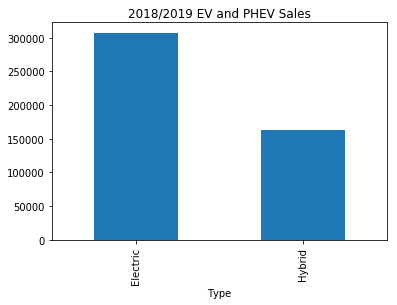

In [6]:
df.groupby('Type')['TOTAL'].sum().plot(kind='bar',title='2018/2019 EV and PHEV Sales')

In [7]:
df18=df
df18=df18.drop(df18.index[[22,25,37,40,44]])

## Companies EV/PHEV Market Share 

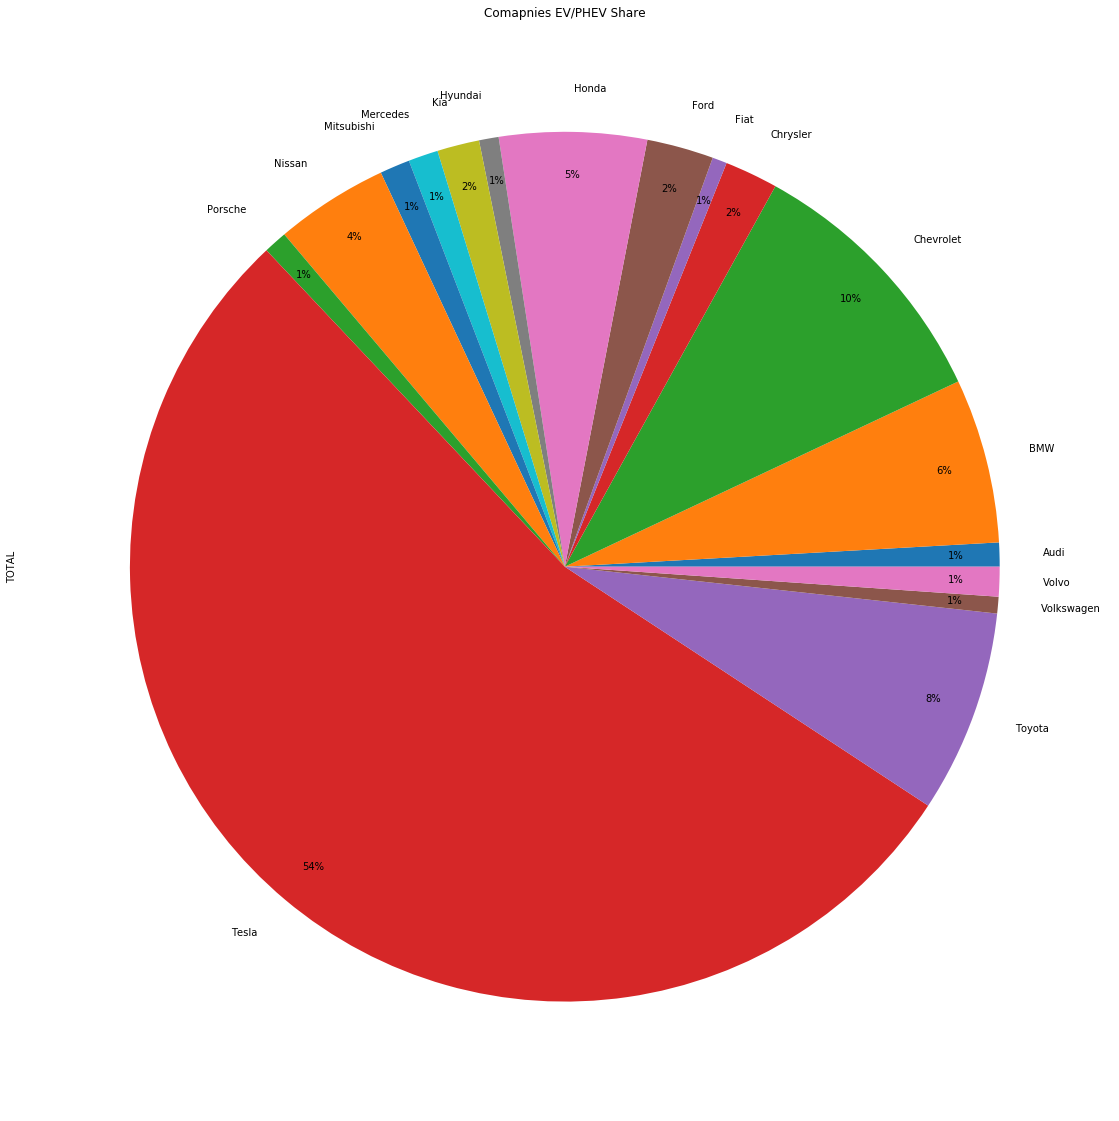

In [8]:
df18.groupby('Make')['TOTAL'].sum().plot(kind='pie',figsize=(20,20), title='Comapnies EV/PHEV Share',  pctdistance=.9,autopct='%1.0f%%')

In [9]:
df_ev=df[df['Type']=='Electric']
df_ev=df_ev.reset_index()
df_ev=df_ev.drop(df_ev.index[[7,8,9,10,11,12,13,14,15,16]])

## Companies EV/PHEV Market Share

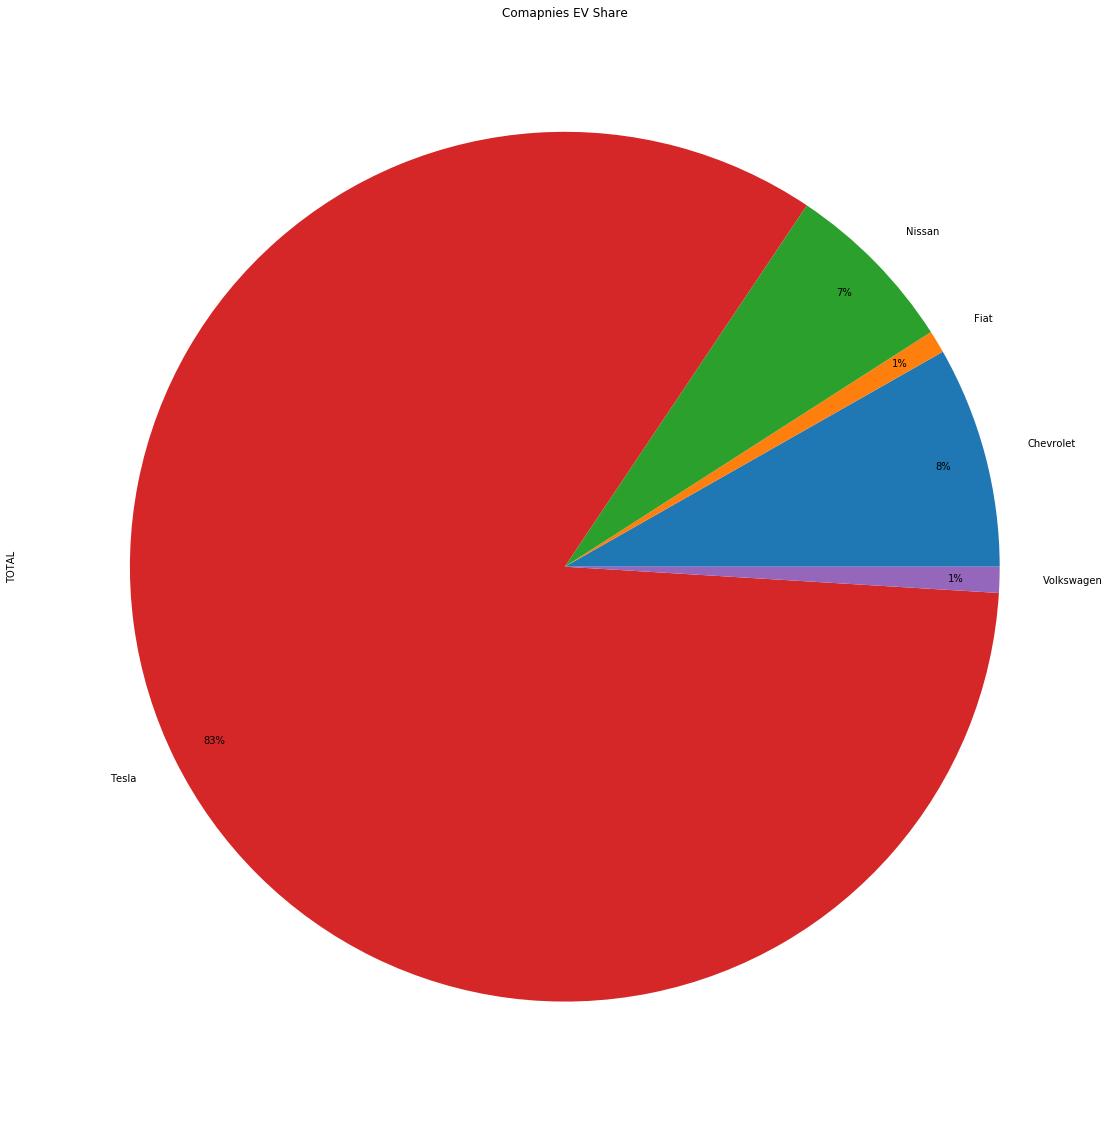

In [10]:
df_ev.groupby('Make')['TOTAL'].sum().plot(kind='pie',figsize=(20,20), title='Comapnies EV Share',  pctdistance=.9,autopct='%1.0f%%')

In [11]:
df_ev19=df[df['Type']=='Electric']
df_ev19=df_ev19.reset_index()
df_ev19=df_ev19.drop(['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18', 'Jun18', 'Jul18', 'Aug18',
       'Sep18', 'Oct18', 'Nov18', 'Dec18'],axis=1)

In [12]:
df_ev19=df_ev19.drop(df_ev19.index[13])

## Companies 2019 Market Share

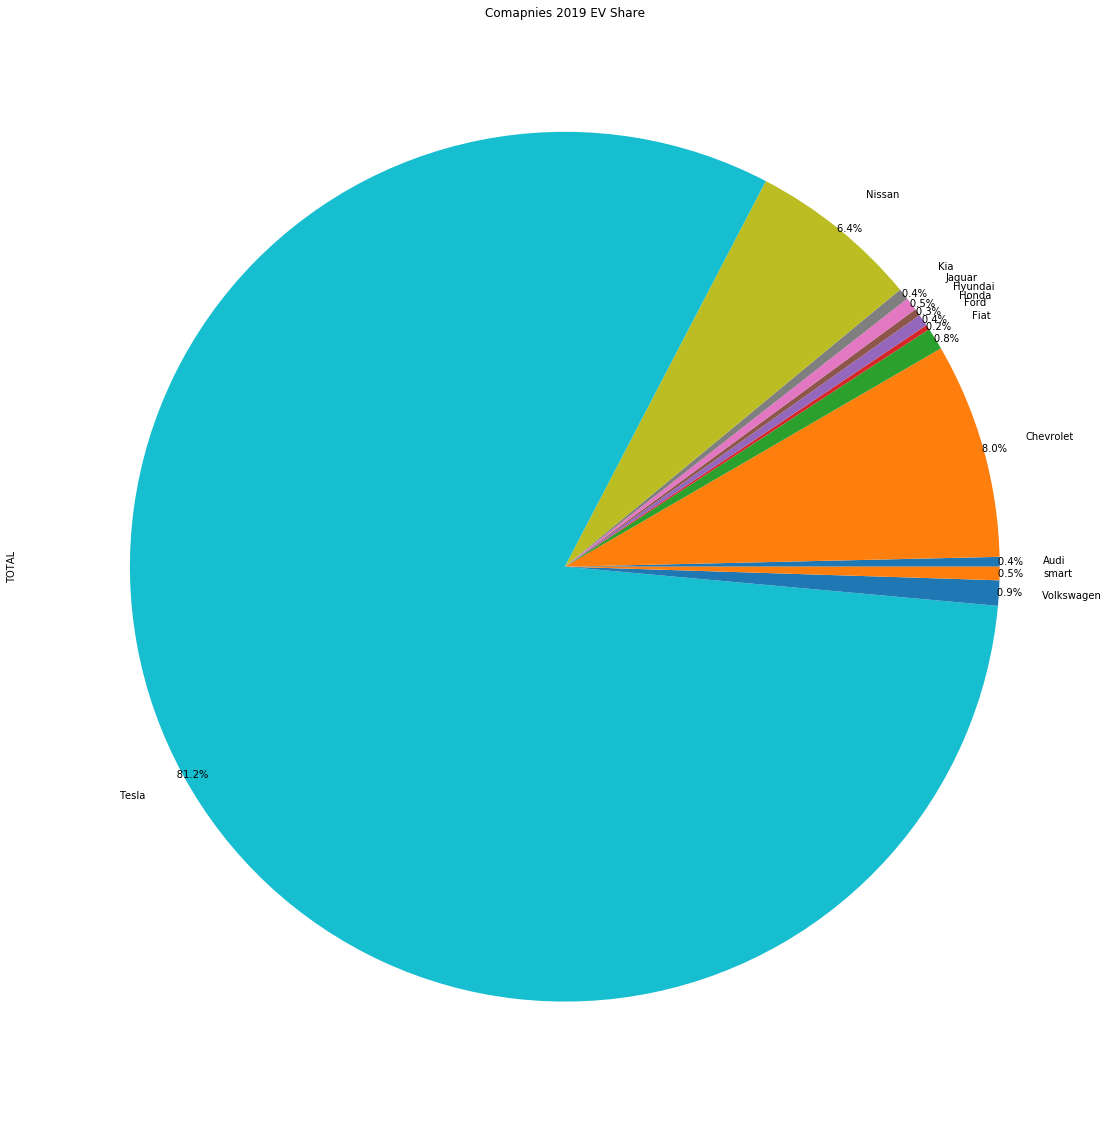

In [13]:
df_ev19.groupby('Make')['TOTAL'].sum().plot(kind='pie',figsize=(20,20), title='Comapnies 2019 EV Share',  pctdistance=1,autopct='%10.01f%%')

In [14]:
df_phev=df[df['Type']=='Hybrid']
df_phev=df_phev.reset_index()


## Companies Hybrid Market Share

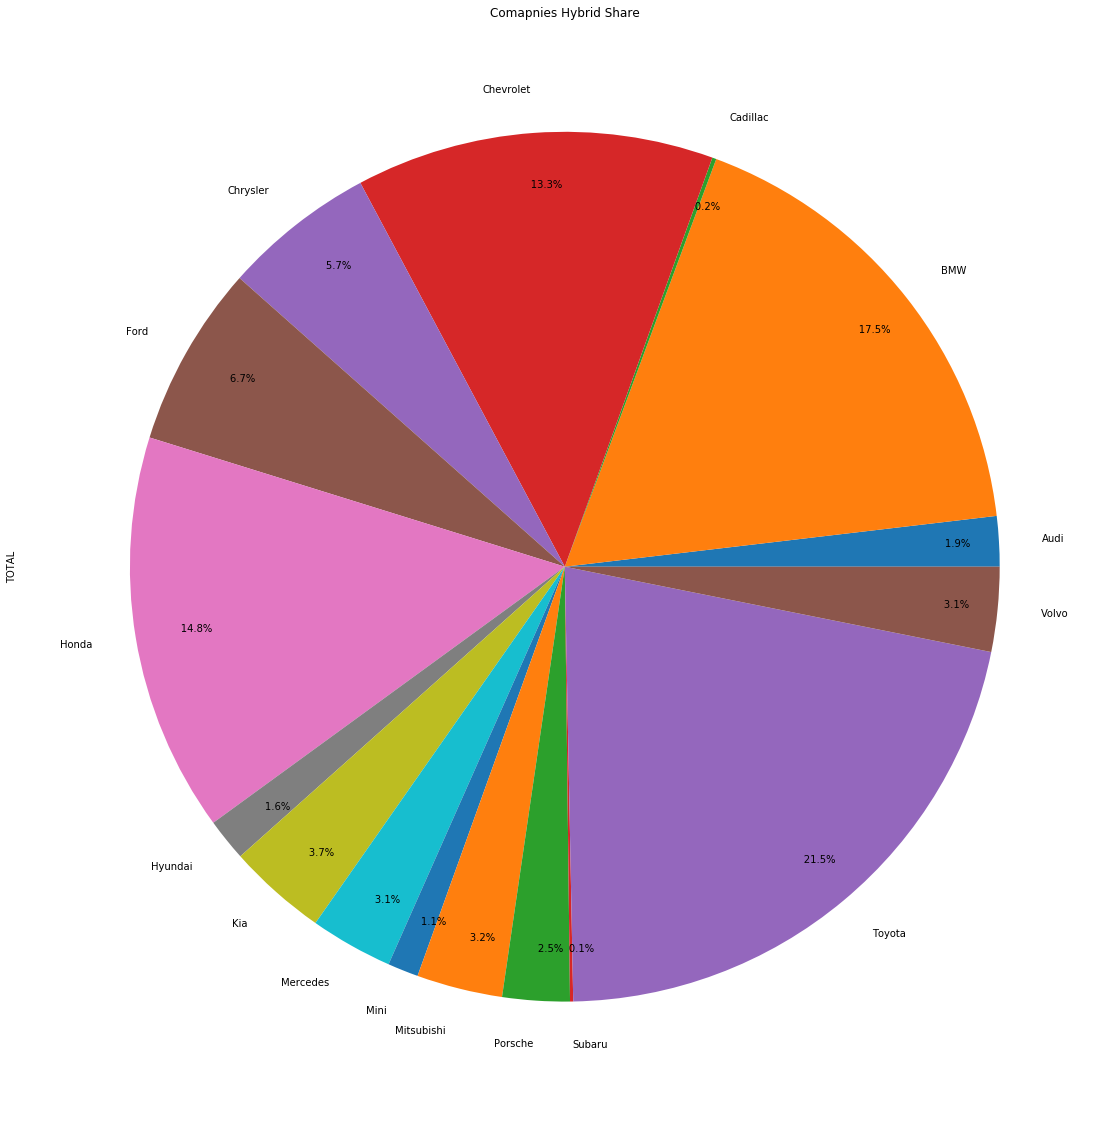

In [15]:
df_phev.groupby('Make')['TOTAL'].sum().plot(kind='pie',figsize=(20,20), title='Comapnies Hybrid Share',  pctdistance=0.88,autopct='%10.01f%%')

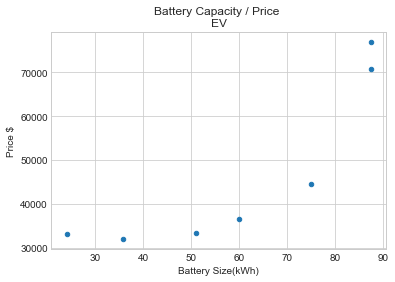

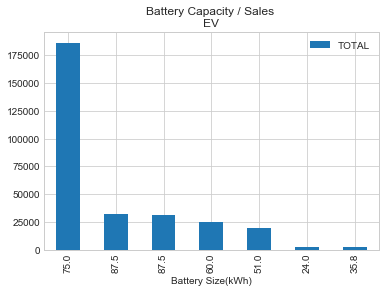

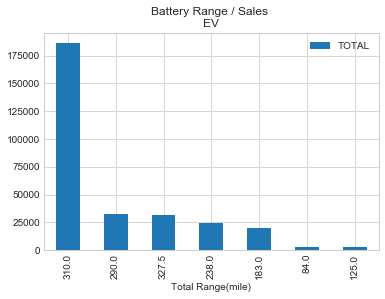

In [16]:
plt.style.use('seaborn-whitegrid')
df_ev.plot(x='Battery Size(kWh)',y='Price $',kind='scatter',title='Battery Capacity / Price \nEV')
df_ev.plot(x='Battery Size(kWh)',y='TOTAL',kind='bar',title='Battery Capacity / Sales \nEV')
df_ev.plot(x='Total Range(mile)',y='TOTAL',kind='bar',title='Battery Range / Sales \nEV')

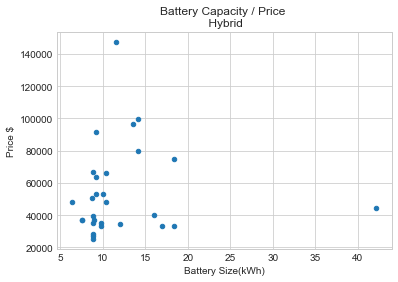

In [17]:
df_phev.plot(x='Battery Size(kWh)',y='Price $',kind='scatter',title='Battery Capacity / Price \n Hybrid')
#df_phev.plot(x='Battery Size(kWh)',y='TOTAL',kind='bar',title='Battery Capacity / Sales \n Hybrid')
#df_phev.plot(x='Total Range(mile)',y='TOTAL',kind='bar',title='Battery Range / Sales \n Hybrid')

In [18]:
df_month=df.groupby('Make')[['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18',
       'Jun18', 'Jul18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19',
       'Feb19', 'Mar19', 'Apr19', 'May19']].sum()
df_month_phev=df_phev.groupby('Make')[['Jan18', 'Feb18', 'Mar18', 'Apr18', 'May18',
       'Jun18', 'Jul18', 'Aug18', 'Sep18', 'Oct18', 'Nov18', 'Dec18', 'Jan19',
       'Feb19', 'Mar19', 'Apr19', 'May19']].sum()

In [19]:
df_month.index[7]

'Honda'

## Companies EV/PHEV Monthly Sales

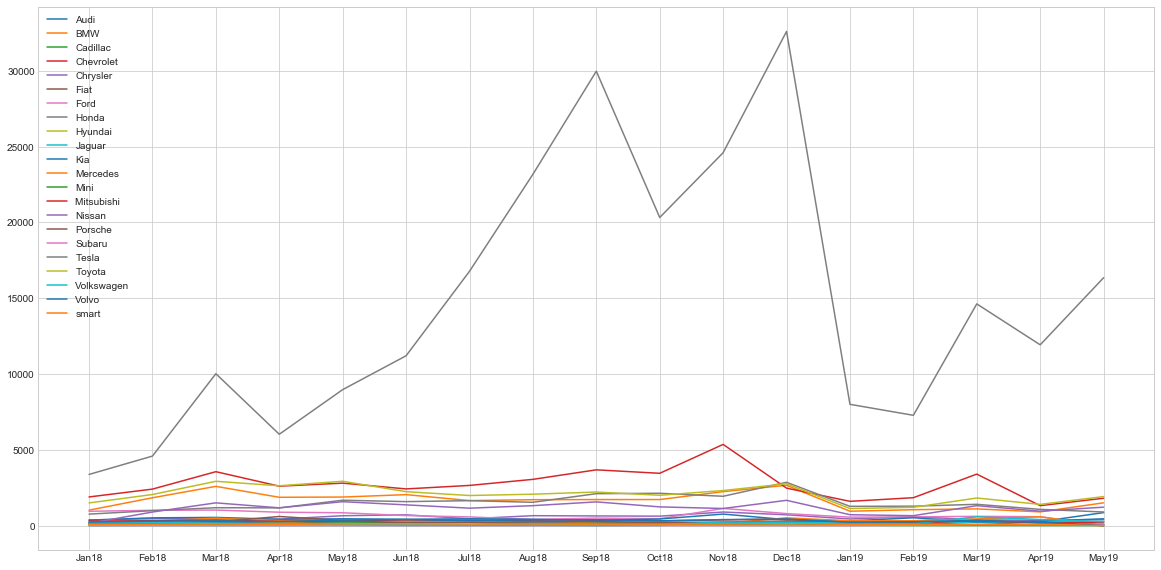

In [20]:
#df_month.plot(x='Make',y='Jan18')
plt.figure(figsize=(20,10))
for i,item in enumerate(df_month.values):
    plt.plot(df_month.columns,item,label=df_month.index[i])
    plt.legend(numpoints=1)

## Honda vs Tesla

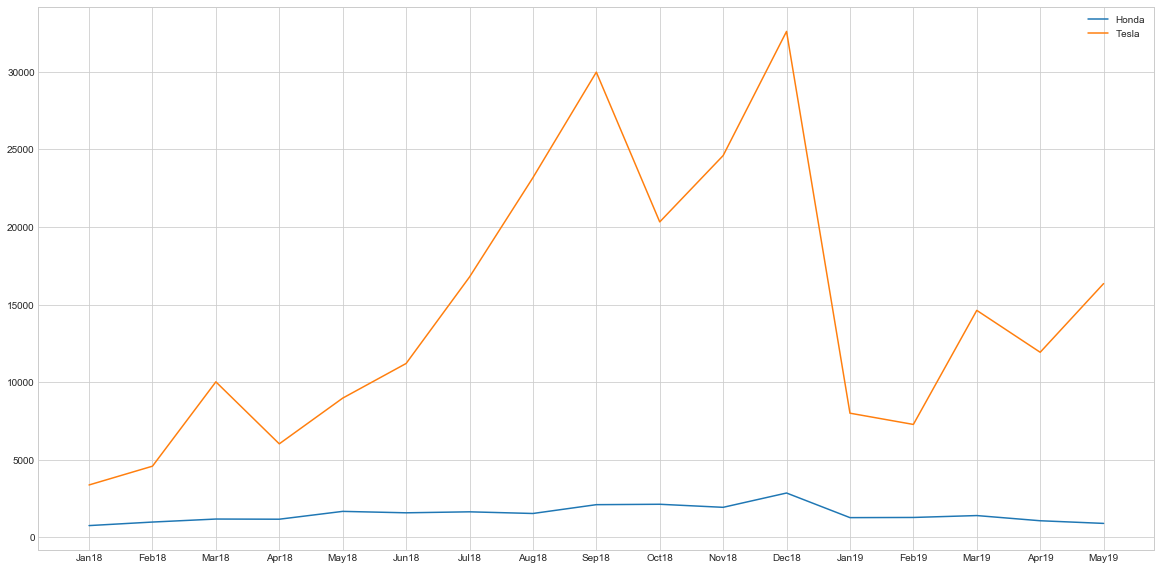

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df_month.columns,df_month.values[7],label=df_month.index[7])
plt.plot(df_month.columns,df_month.values[17],label=df_month.index[17])
plt.legend(numpoints=1)

## Companies Hybrid Monthly Sales

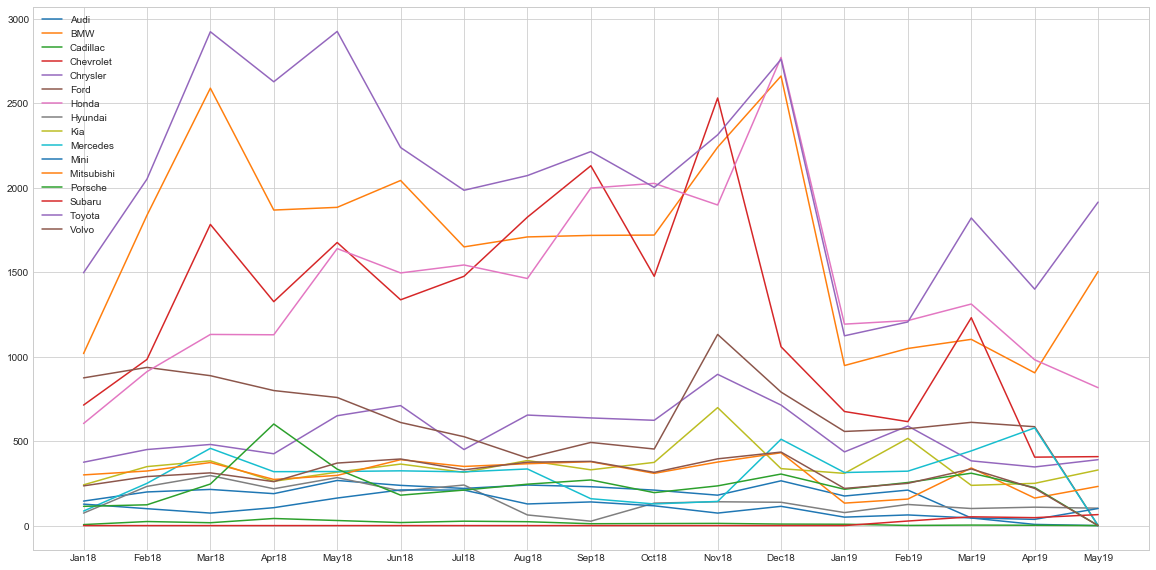

In [22]:
plt.figure(figsize=(20,10))
for i,item in enumerate(df_month_phev.values):
    plt.plot(df_month_phev.columns,item,label=df_month_phev.index[i])
    plt.legend(numpoints=1)

## Top 4 best selling Companies Hybrid Monthly Sales

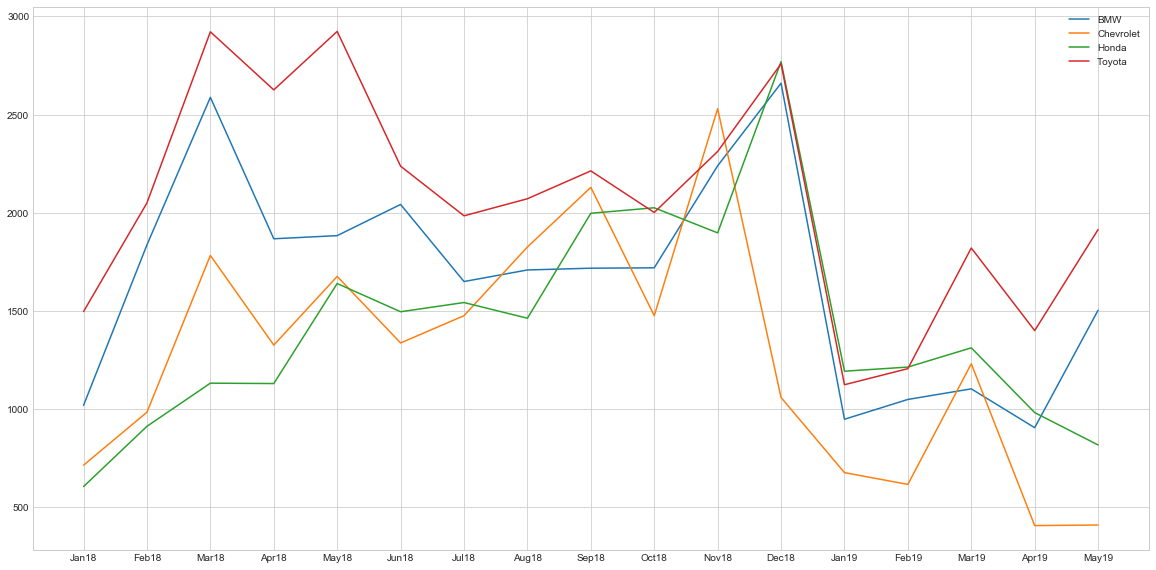

In [23]:
plt.figure(figsize=(20,10))
for i in {1,3,6,14}:
    plt.plot(df_month_phev.columns,df_month_phev.values[i],label=df_month_phev.index[i])
    plt.legend(numpoints=1)

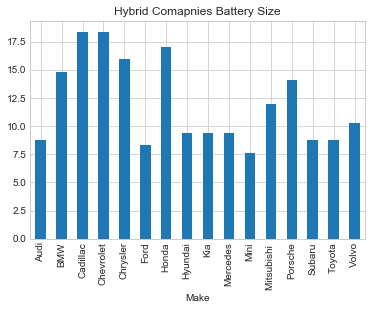

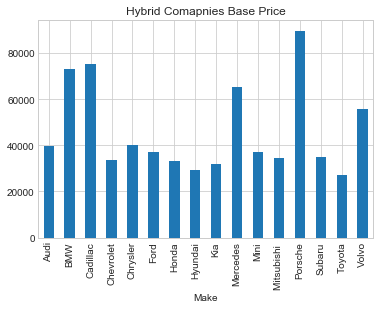

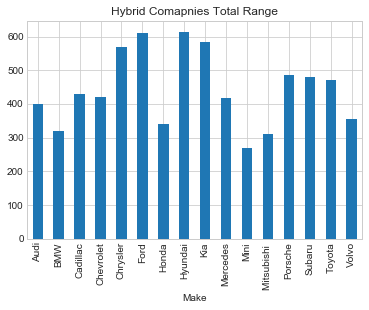

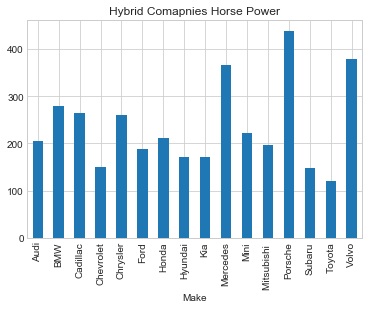

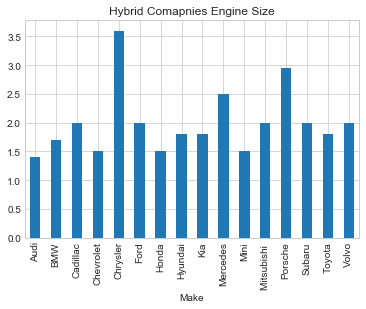

In [24]:
df_month_battery_phev=df_phev.groupby('Make')['Battery Size(kWh)'].mean().plot(kind='bar',title='Hybrid Comapnies Battery Size')
plt.show()
df_month_msrp_phev=df_phev.groupby('Make')['Price $'].mean().plot(kind='bar',title='Hybrid Comapnies Base Price')
plt.show()
df_month_range_phev=df_phev.groupby('Make')['Total Range(mile)'].mean().plot(kind='bar',title='Hybrid Comapnies Total Range') 
plt.show()
df_month_hp_phev=df_phev.groupby('Make')['HorsePower'].mean().plot(kind='bar',title='Hybrid Comapnies Horse Power')
plt.show()
df_month_engine_phev=df_phev.groupby('Make')['Engine(liter)'].mean().plot(kind='bar',title='Hybrid Comapnies Engine Size') 

## Thank you For Reading!